In [1]:
from ddrnet_23_slim import DualResNet as DualResNet_tens
from DDRNet_23_slim_official import DualResNet_imagenet_off
from pretrained_model_mapping import set_weight
from comparison_test import test
import torch
import numpy as np
import keras
import tensorflow as tf
from comparison_test import test

In [20]:
net = DualResNet_imagenet_off(pretrained=True)
weight_net = net.state_dict()
torch_model = net.eval()

In [4]:
model= DualResNet_tens((224, 224, 3), 3, 19, comparison_test=True)
set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)

In [5]:
torch_model = torch_model.eval()
  
torch_inputs = torch.Tensor(np.random.rand(1, 3, 224, 224))

tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
with torch.no_grad():
    torch_output = torch_model(torch_inputs)

tf_output = model.predict(tf_inputs)

In [21]:
res = []
res_all = []

for num in [224, 400, 800, 1000]:
    
    model= DualResNet_tens((num, num, 3), 1, 19, comparison_test=True)
    set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)
    
    torch_inputs = torch.Tensor(np.random.rand(1, 3, num, num))

    tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
    with torch.no_grad():
        torch_output = torch_model(torch_inputs)

    tf_output = model.predict(tf_inputs)
    
    for i in range(16):
            res.append(test(torch_output, tf_output, i))
            
    res_all.append(res)
    res = []

Max difference in conv1 is :9.5367431640625e-07 and avg is: 4.6562693256646526e-08
Max difference in layer1 is :2.205371856689453e-06 and avg is: 2.21301988290179e-07
Max difference in layer2 is :2.86102294921875e-06 and avg is: 2.6855866508412873e-07
Max difference in layer3 is :2.0563602447509766e-06 and avg is: 2.015348599115896e-07
Max difference in layer3_ is :3.933906555175781e-06 and avg is: 4.403573541367223e-07
Max difference in down3 is :3.2186508178710938e-06 and avg is: 1.3991552805237006e-07
Max difference in copression3 is :3.956258296966553e-06 and avg is: 3.792745530972752e-07
Max difference in layer4 is :2.0265579223632812e-06 and avg is: 2.7482164455250313e-07
Max difference in layer4_ is :5.334615707397461e-06 and avg is: 5.340432949196838e-07
Max difference in down4 is :2.0116567611694336e-06 and avg is: 1.509221050355336e-07
Max difference in compression4 is :4.544854164123535e-06 and avg is: 4.735959180379723e-07
Max difference in layer5_ is :3.814697265625e-06 an

In [22]:
res_all

[[9.536743e-07,
  2.2053719e-06,
  2.861023e-06,
  2.0563602e-06,
  3.9339066e-06,
  3.2186508e-06,
  3.9562583e-06,
  2.026558e-06,
  5.3346157e-06,
  2.0116568e-06,
  4.544854e-06,
  3.8146973e-06,
  1.5795231e-06,
  6.854534e-07,
  6.7055225e-07,
  3.1664968e-07],
 [8.34465e-07,
  2.1457672e-06,
  3.0398369e-06,
  2.8908253e-06,
  4.4107437e-06,
  2.7269125e-06,
  4.604459e-06,
  2.6524067e-06,
  7.4505806e-06,
  2.0563602e-06,
  7.4505806e-06,
  4.053116e-06,
  1.7285347e-06,
  7.599592e-07,
  7.301569e-07,
  3.1851232e-07],
 [1.0728836e-06,
  2.7418137e-06,
  3.2186508e-06,
  3.4719706e-06,
  4.142523e-06,
  3.8594007e-06,
  4.23193e-06,
  3.0398369e-06,
  6.198883e-06,
  2.5629997e-06,
  6.198883e-06,
  4.529953e-06,
  2.1010637e-06,
  7.003546e-07,
  6.7055225e-07,
  3.501773e-07],
 [1.1920929e-06,
  2.6226044e-06,
  3.2186508e-06,
  2.6226044e-06,
  4.61936e-06,
  3.33786e-06,
  5.00679e-06,
  3.2186508e-06,
  7.1525574e-06,
  2.7269125e-06,
  7.390976e-06,
  5.00679e-06,
  1.9

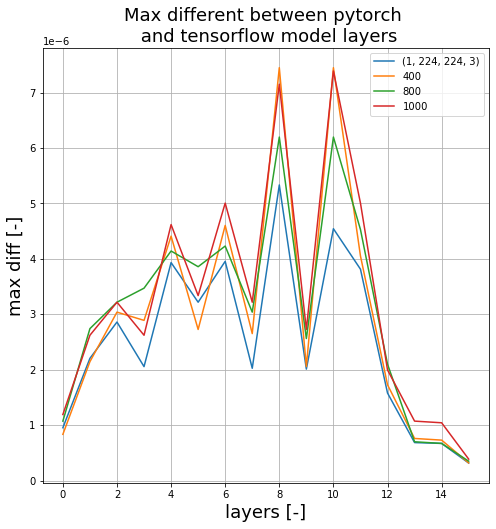

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))


plt.plot(res_all[0])
plt.plot(res_all[1])
plt.plot(res_all[2])
plt.plot(res_all[3])

plt.ylabel('max diff [-]', fontsize=18)
plt.xlabel('layers [-]', fontsize=18)
plt.title('Max different between pytorch \n and tensorflow model layers', 
          fontsize=18)
plt.grid()
plt.legend([(1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3)])
plt.show()